# Explore the impact of temperature on aging variability

Re-plot a few things to assess temperature impact to variability

Created: 12/7/2021

Author:  Andrew Weng

In [2]:
import os, sys

if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('../')
    sys.path.insert(0, 'src/')

import numpy as np
import pandas as pd
import glob, re, pprint, random
from datetime import datetime
import pprint

from scipy.stats import pearsonr, ttest_ind
from scipy.signal import savgol_filter
from scipy import interpolate

from sklearn.linear_model import LinearRegression
import seaborn as sns
from matplotlib import pyplot as plt

from src.formation import FormationCell
from src.utils import get_label_registry

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)

## Configure plot settings

In [4]:
# Configure plot settings
plt.rc('font', **{'family'     : 'sans-serif',
                  'sans-serif' : ['Arial'],
                  'size': 18
                  })
plt.rc('figure', **{'autolayout' : True,
                    'figsize'    : (7, 5),
                    'facecolor'  : 'white',
                    'dpi'        : 150
                    })
plt.rc('xtick', labelsize='medium')
plt.rc('ytick', labelsize='medium')
plt.rc('axes',  labelsize='medium', grid=False)
plt.rc('axes',  titlesize='medium')
plt.rc('legend', fontsize='medium')


## Configure globals

In [5]:
# Formation types
CELL_BASE = 7
CELL_FAST = 33
COLOR_BASE = np.array([0, 0, 0])
COLOR_FAST = np.array([44, 121, 245])/255
COLOR_FAST_RT = np.array([0, 0, 1])
COLOR_FAST_HT = np.array([1, 0, 0])
LINESTYLE_BASE = ':'
LINESTYLE_FAST = '-'

# Pos/neg electrode colors
COLOR_POS = np.array([0, 0, 1])
COLOR_NEG = np.array([1, 0, 0])
COLOR_FULL_CELL = np.array([0, 0, 0])

COLOR_REF = (0.7, 0.7, 0.7)

NOMINAL_CAPACITY_AH = 2.36
CAPACITY_LIMITS_AH = (0.8, 2.4)
TARGET_RETENTION = 0.7

GREY = (0.9, 0.9, 0.9)

## Load resources

In [6]:
cell_dict = dict()
cellid_list = np.arange(1, 41)

for cellid in cellid_list:
    
    if cellid == 9:
        continue
        
    cell_dict[cellid] = FormationCell(cellid)

(0.8, 2.4)

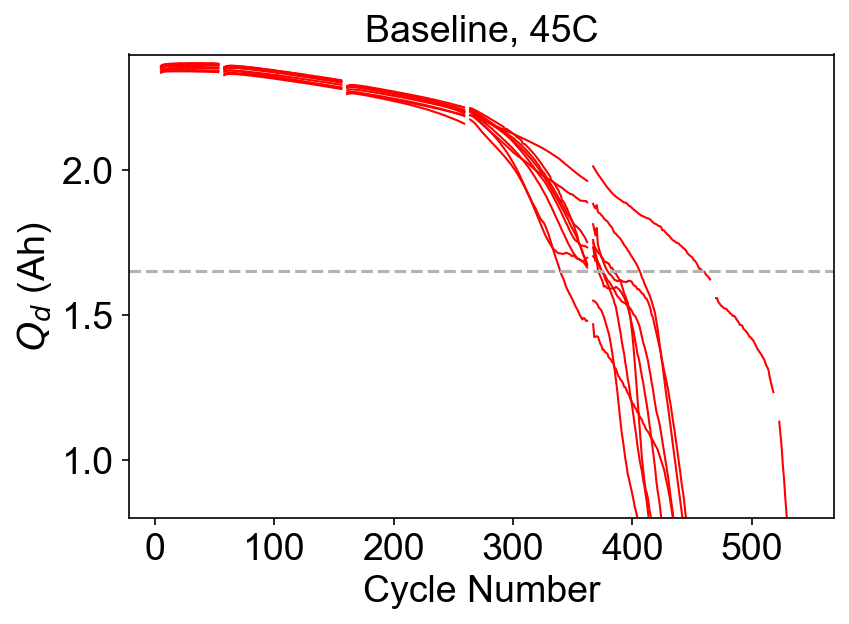

In [44]:
plt.figure(figsize=(6, 4.5))

for cellid, cell in cell_dict.items():
    
    if not cell.is_baseline_formation() or cell.cellid == 9 or cell.is_room_temp():
        continue
        
    if cell.is_room_temp():
        color = COLOR_FAST_RT
    else:
        color = COLOR_FAST_HT
    linestyle = '-'
        
    df = cell.get_aging_data_cycles()
    
    idx = np.where((df['Total Charge Time (s)'] > 8500) |
                   (df['Total Charge Time (s)'] < 100))[0]
    df = df.copy()
    df['Discharge Capacity (Ah)'][idx] = np.nan
    
    cyc = df['Cycle Number']
    cap = df['Discharge Capacity (Ah)']
    
    plt.plot(cyc, cap, 
             color=color, linestyle=linestyle, linewidth=1)
    
plt.axhline(y=TARGET_RETENTION*NOMINAL_CAPACITY_AH, 
        color=COLOR_REF, linestyle='--')
plt.xlabel('Cycle Number')
plt.ylabel('$Q_d$ (Ah)')
plt.title('Baseline, 45C')
plt.ylim(CAPACITY_LIMITS_AH)

(0.8, 2.4)

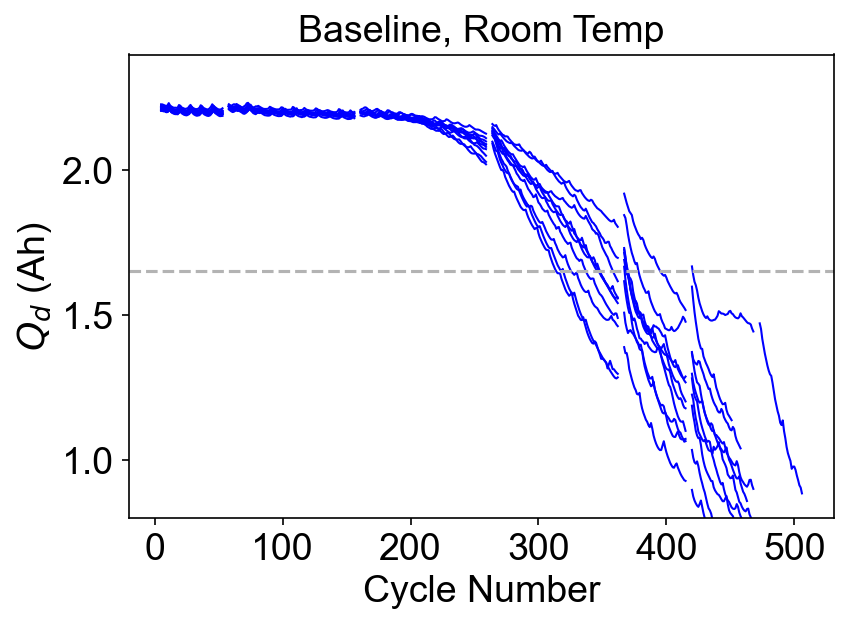

In [23]:
plt.figure(figsize=(6, 4.5))

for cellid, cell in cell_dict.items():
    
    if not cell.is_baseline_formation() or cell.cellid == 9 or not cell.is_room_temp():
        continue
        
    if cell.is_room_temp():
        color = COLOR_FAST_RT
    else:
        color = COLOR_FAST_HT
    linestyle = '-'
        
    df = cell.get_aging_data_cycles()
    
    idx = np.where((df['Total Charge Time (s)'] > 8500) |
                   (df['Total Charge Time (s)'] < 100))[0]
    df = df.copy()
    df['Discharge Capacity (Ah)'][idx] = np.nan
    
    cyc = df['Cycle Number']
    cap = df['Discharge Capacity (Ah)']
    
    plt.plot(cyc, cap, 
             color=color, linestyle=linestyle, linewidth=1)
    
plt.axhline(y=TARGET_RETENTION*NOMINAL_CAPACITY_AH, 
        color=COLOR_REF, linestyle='--')
plt.xlabel('Cycle Number')
plt.ylabel('$Q_d$ (Ah)')
plt.title('Baseline, Room Temp')
plt.ylim(CAPACITY_LIMITS_AH)

(0.8, 2.4)

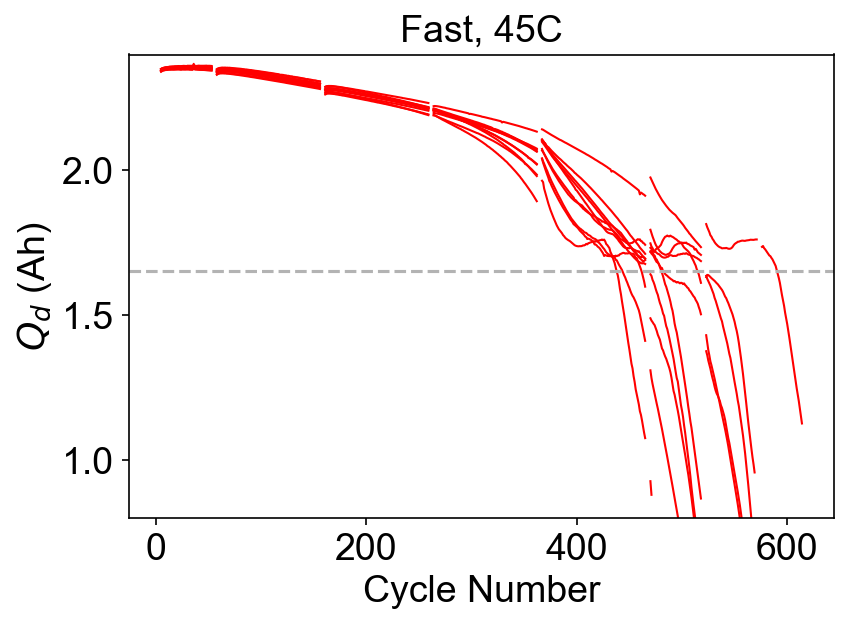

In [22]:
plt.figure(figsize=(6, 4.5))

for cellid, cell in cell_dict.items():
    
    if cell.is_baseline_formation() or cell.cellid == 9 or cell.is_room_temp():
        continue
        
    if cell.is_room_temp():
        color = COLOR_FAST_RT
    else:
        color = COLOR_FAST_HT
    linestyle = '-'
        
    df = cell.get_aging_data_cycles()
    
    idx = np.where((df['Total Charge Time (s)'] > 8500) |
                   (df['Total Charge Time (s)'] < 100))[0]
    df = df.copy()
    df['Discharge Capacity (Ah)'][idx] = np.nan
    
    cyc = df['Cycle Number']
    cap = df['Discharge Capacity (Ah)']
    
    plt.plot(cyc, cap, 
             color=color, linestyle=linestyle, linewidth=1)
    
plt.axhline(y=TARGET_RETENTION*NOMINAL_CAPACITY_AH, 
        color=COLOR_REF, linestyle='--')
plt.xlabel('Cycle Number')
plt.ylabel('$Q_d$ (Ah)')
plt.title('Fast, 45C')
plt.ylim(CAPACITY_LIMITS_AH)

(0.8, 2.4)

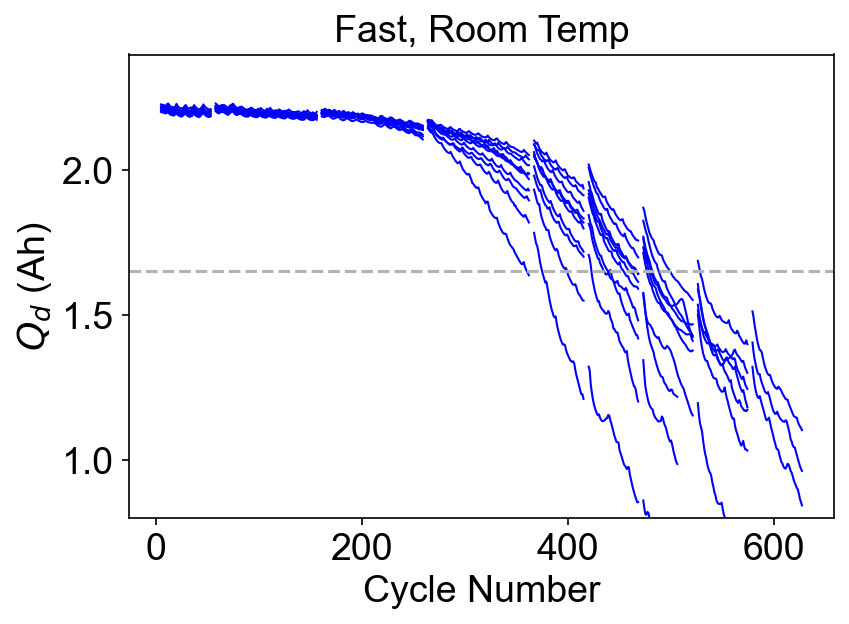

In [21]:
plt.figure(figsize=(6, 4.5))

for cellid, cell in cell_dict.items():
    
    if cell.is_baseline_formation() or cell.cellid == 9 or not cell.is_room_temp():
        continue
        
    if cell.is_room_temp():
        color = COLOR_FAST_RT
    else:
        color = COLOR_FAST_HT
    linestyle = '-'
        
    df = cell.get_aging_data_cycles()
    
    idx = np.where((df['Total Charge Time (s)'] > 8500) |
                   (df['Total Charge Time (s)'] < 100))[0]
    df = df.copy()
    df['Discharge Capacity (Ah)'][idx] = np.nan
    
    cyc = df['Cycle Number']
    cap = df['Discharge Capacity (Ah)']
    
    plt.plot(cyc, cap, 
             color=color, linestyle=linestyle, linewidth=1)
    
plt.axhline(y=TARGET_RETENTION*NOMINAL_CAPACITY_AH, 
        color=COLOR_REF, linestyle='--')
plt.xlabel('Cycle Number')
plt.ylabel('$Q_d$ (Ah)')
plt.title('Fast, Room Temp')
plt.ylim(CAPACITY_LIMITS_AH)

(0.8, 2.4)

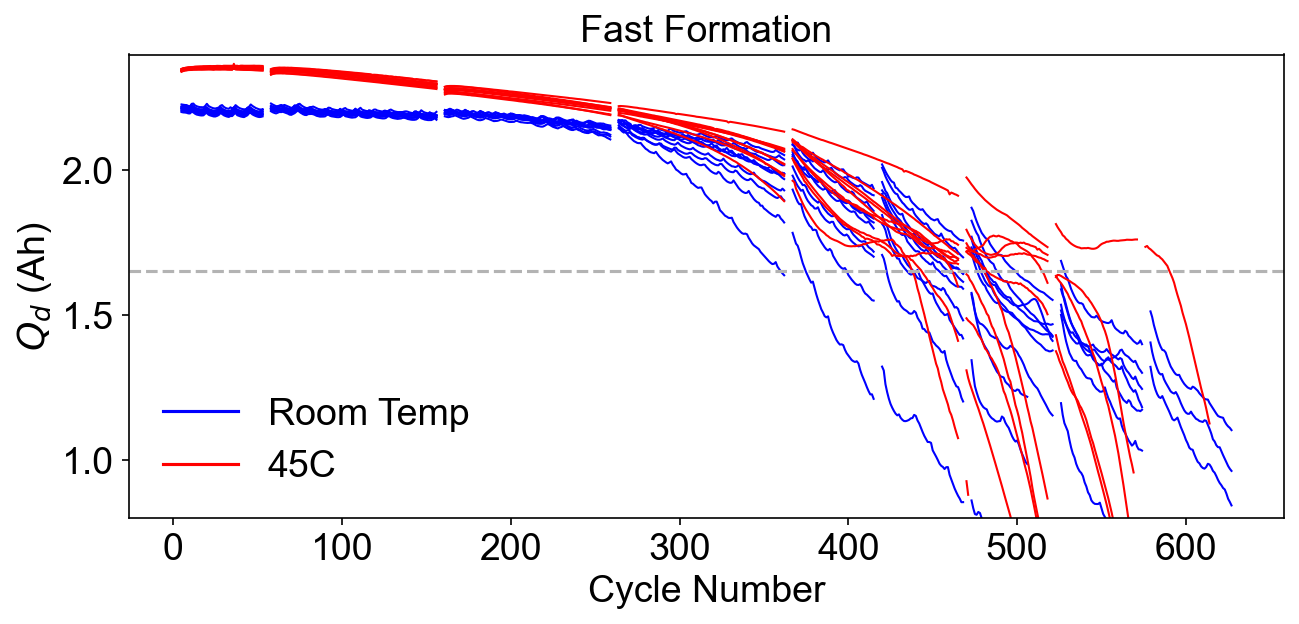

In [26]:
plt.figure(figsize=(9, 4.5))

for cellid, cell in cell_dict.items():
    
    if cell.is_baseline_formation() or cell.cellid == 9:
        continue
        
    if cell.is_room_temp():
        color = COLOR_FAST_RT
    else:
        color = COLOR_FAST_HT
    linestyle = '-'
        
    df = cell.get_aging_data_cycles()
    
    idx = np.where((df['Total Charge Time (s)'] > 8500) |
                   (df['Total Charge Time (s)'] < 100))[0]
    df = df.copy()
    df['Discharge Capacity (Ah)'][idx] = np.nan
    
    cyc = df['Cycle Number']
    cap = df['Discharge Capacity (Ah)']
    
    plt.plot(cyc, cap, 
             color=color, linestyle=linestyle, linewidth=1)
    
plt.plot(np.nan, np.nan, label='Room Temp',
        color=COLOR_FAST_RT, linestyle=linestyle)
plt.plot(np.nan, np.nan, label='45C',
        color=COLOR_FAST_HT, linestyle=linestyle)
plt.axhline(y=TARGET_RETENTION*NOMINAL_CAPACITY_AH, 
        color=COLOR_REF, linestyle='--')
plt.legend(loc=3, frameon=False)
plt.xlabel('Cycle Number')
plt.ylabel('$Q_d$ (Ah)')
plt.title('Fast Formation')
plt.ylim(CAPACITY_LIMITS_AH)

(0.8, 2.4)

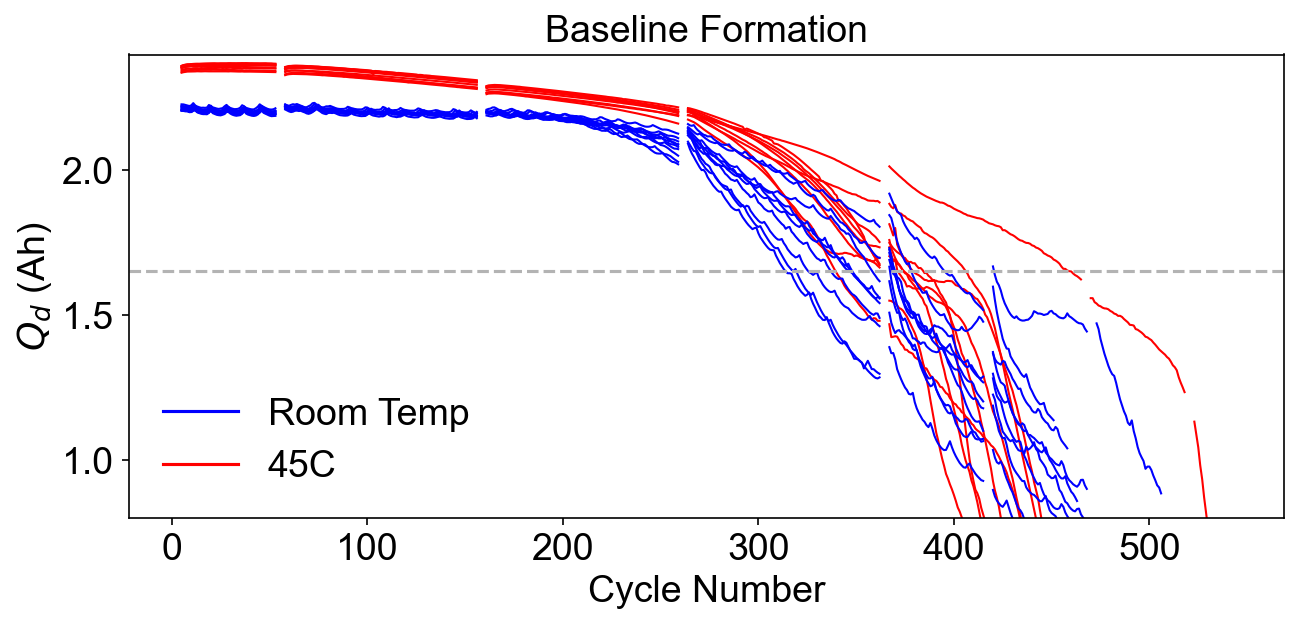

In [25]:
plt.figure(figsize=(9, 4.5))

for cellid, cell in cell_dict.items():
    
    if not cell.is_baseline_formation() or cell.cellid == 9:
        continue
        
    if cell.is_room_temp():
        color = COLOR_FAST_RT
    else:
        color = COLOR_FAST_HT
    linestyle = '-'
        
    df = cell.get_aging_data_cycles()
    
    idx = np.where((df['Total Charge Time (s)'] > 8500) |
                   (df['Total Charge Time (s)'] < 100))[0]
    df = df.copy()
    df['Discharge Capacity (Ah)'][idx] = np.nan
    
    cyc = df['Cycle Number']
    cap = df['Discharge Capacity (Ah)']
    
    plt.plot(cyc, cap, 
             color=color, linestyle=linestyle, linewidth=1)
    
plt.plot(np.nan, np.nan, label='Room Temp',
        color=COLOR_FAST_RT, linestyle=linestyle)
plt.plot(np.nan, np.nan, label='45C',
        color=COLOR_FAST_HT, linestyle=linestyle)
plt.axhline(y=TARGET_RETENTION*NOMINAL_CAPACITY_AH, 
        color=COLOR_REF, linestyle='--')
plt.legend(loc=3, frameon=False)

plt.xlabel('Cycle Number')
plt.ylabel('$Q_d$ (Ah)')
plt.title('Baseline Formation')
plt.ylim(CAPACITY_LIMITS_AH)

In [28]:
# Get the data
results_list = []

for cellid, cell in cell_dict.items():
    
    print(f'Processing cell {cell}...')

    stats_dict = cell.get_aging_test_summary_statistics()

    for retention in np.array([50, 60, 70, 80]):

        curr_dict = dict()
        curr_dict['cellid'] = cell.cellid
        curr_dict['is_room_temp'] = cell.is_room_temp()
        curr_dict['formation_type'] = 'Baseline Formation' if cell.is_baseline_formation() else 'Fast Formation'
        curr_dict['retention'] = retention
        curr_dict['cycles'] = stats_dict[f'cycles_to_{retention}_pct']
        curr_dict['ahah'] = stats_dict[f'ahah_to_{retention}_pct']
            
        results_list.append(curr_dict)
        
df = pd.DataFrame(results_list)
df['retention'] = df['retention'].astype('category')




Processing cell Formation Cell 1...
Processing cell Formation Cell 2...
Processing cell Formation Cell 3...
Processing cell Formation Cell 4...
Processing cell Formation Cell 5...
Processing cell Formation Cell 6...
Processing cell Formation Cell 7...
Processing cell Formation Cell 8...
Processing cell Formation Cell 10...
Processing cell Formation Cell 11...
Processing cell Formation Cell 12...
Processing cell Formation Cell 13...
Processing cell Formation Cell 14...
Processing cell Formation Cell 15...
Processing cell Formation Cell 16...
Processing cell Formation Cell 17...
Processing cell Formation Cell 18...
Processing cell Formation Cell 19...
Processing cell Formation Cell 20...
Processing cell Formation Cell 21...
Processing cell Formation Cell 22...
Processing cell Formation Cell 23...
Processing cell Formation Cell 24...
Processing cell Formation Cell 25...
Processing cell Formation Cell 26...
Processing cell Formation Cell 27...
Processing cell Formation Cell 28...
Processin

In [38]:

df_room_temp = df[df['is_room_temp'] == 1]
df_high_temp = df[df['is_room_temp'] == 0]
df_baseline  = df[df['formation_type'] == 'Baseline Formation']
df_fast      = df[df['formation_type'] == 'Fast Formation']

In [39]:
df.to_csv('end_of_life_retention.csv')
std_over_mean = lambda x: np.std(x) / np.mean(x)
iqr_over_mean = lambda x: (np.percentile(x, 75) - np.percentile(x, 25)) / np.median(x)
iqr = lambda x: np.percentile(x, 75) - np.percentile(x, 25)
this_df = df.drop(columns=['cellid'])
this_df = this_df.groupby(['is_room_temp', 'formation_type', 'retention']) \
                 .agg(['mean', 'std', std_over_mean, iqr, iqr_over_mean])['cycles']
this_df

mean        std  <lambda_0>  \
is_room_temp formation_type     retention                                      
False        Baseline Formation 50         423.111111  39.001424    0.086906   
                                60         410.111111  37.321055    0.085798   
                                70         379.666667  33.548472    0.083309   
                                80         338.444444  21.880991    0.060954   
             Fast Formation     50         524.200000  45.266618    0.081922   
                                60         511.700000  46.180924    0.085619   
                                70         491.300000  46.212192    0.089234   
                                80         405.400000  31.672631    0.074118   
True         Baseline Formation 50         429.600000  29.620563    0.065411   
                                60         399.700000  36.712244    0.087136   
                                70         358.700000  26.415694    0.069864   
                                80         326.500000  24.084343    0.069980   
             Fast Formation     50         551.900000  58.014270    0.099723   
                                60         517.700000  56.566676    0.103658   
                                70         467.100000  42.680857    0.086685   
                                80         414.900000  38.036386    0.086972   

                                           <lambda_1>  <lambda_2>  
is_room_temp formation_type     retention                          
False        Baseline Formation 50              29.00    0.070388  
                                60              30.00    0.074627  
                                70              19.00    0.050938  
                                80              12.00    0.035714  
             Fast Formation     50              53.00    0.101630  
                                60              56.75    0.111493  
                                70              55.75    0.116146  
                                80              24.00    0.059701  
True         Baseline Formation 50              35.75    0.082947  
                                60              17.50    0.043805  
                                70              28.25    0.078911  
                                80              31.75    0.097542  
             Fast Formation     50              80.00    0.140598  
                                60              61.50    0.113994  
                                70              41.25    0.084877  
                                80              40.50    0.093859

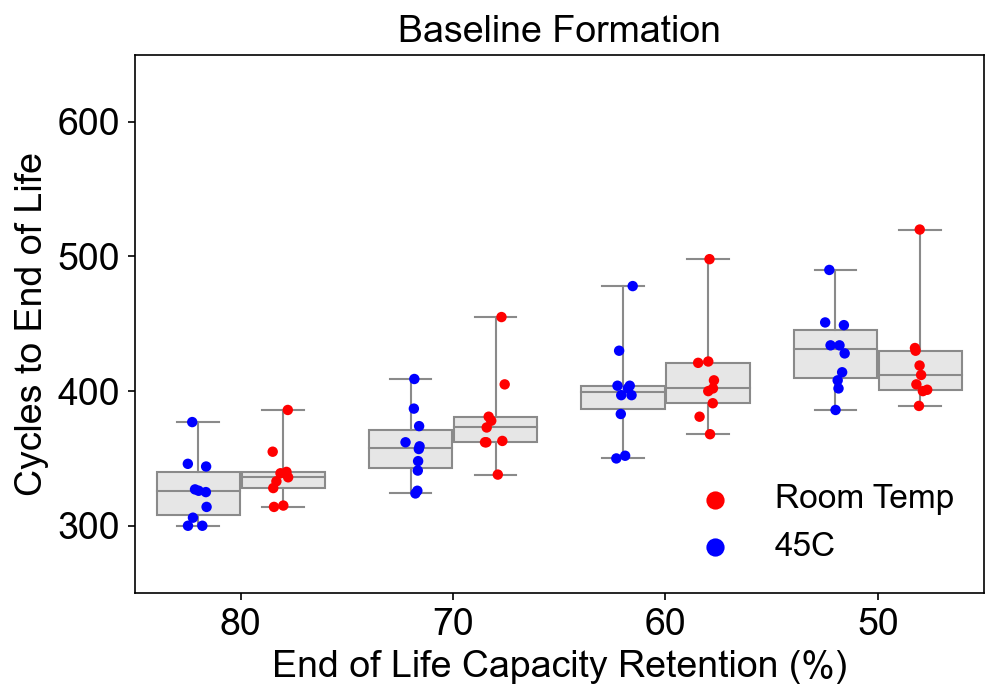

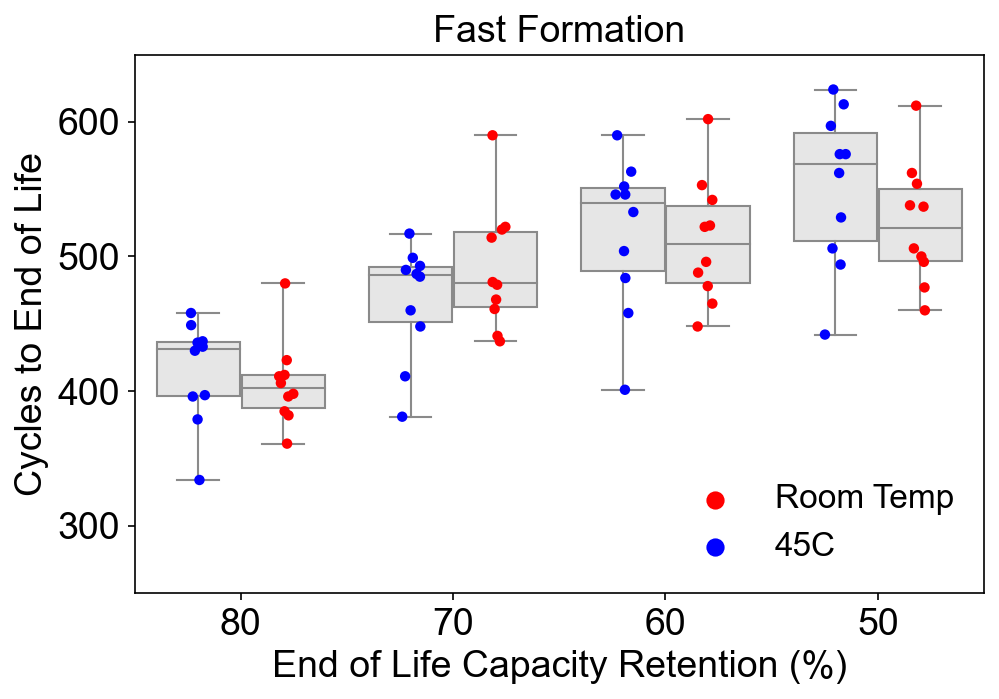

In [43]:
for data_df, color, color2, name in zip([df_baseline, df_fast], 
                            [(0.8, 0.8, 1), (1, 0.8, 0.8)],
                            ['b', 'r'], ['Baseline Formation', 'Fast Formation']):
    
    plt.figure(figsize=(7,5))

    bp = sns.boxplot(x='retention', y='cycles',
                     data=data_df,
                     palette=[GREY, GREY],
                     hue='is_room_temp',
                     showfliers=False,
                     whis=1e9,
                     linewidth=1
                    )

    bp = sns.stripplot(x='retention', y='cycles', 
                       data=data_df, 
                       jitter=True,
                       dodge=True, 
                       marker='o',
                       palette=['red', 'blue'],
                       hue='is_room_temp',
                       alpha=1)

    bp.invert_xaxis()
    
    bp.set(ylabel='Cycles to End of Life',
           xlabel='End of Life Capacity Retention (%)',
           title='',
           ylim=(250,650))

    ax = plt.gca()
    ax.grid(False)

    handles, labels = bp.get_legend_handles_labels()
    l = plt.legend(handles[2:4], ['Room Temp', '45C'], 
                   prop={'size': 16}, 
                   frameon=False,
                   loc='lower right')
    
    plt.title(name)

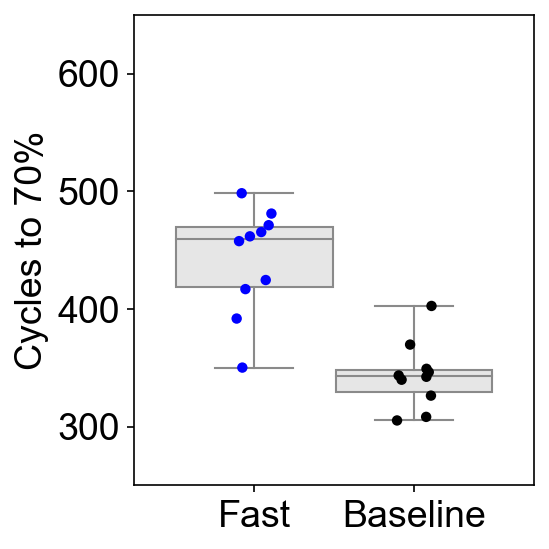

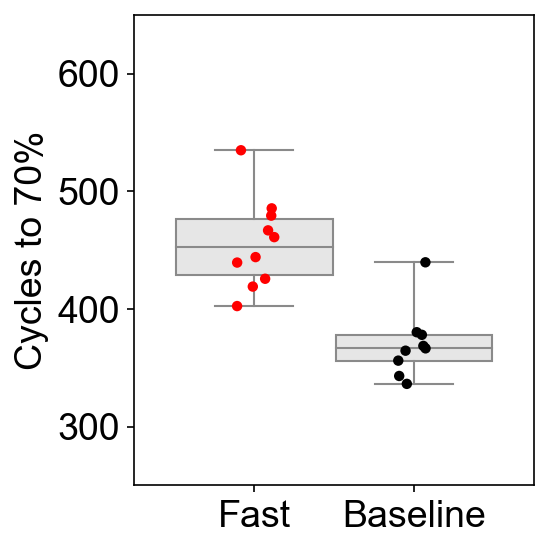

In [18]:
for data_df, color, color2 in zip([df_room_temp, df_high_temp], 
                            [(0.8, 0.8, 1), (1, 0.8, 0.8)],
                            ['b', 'r']):
    
    plt.figure(figsize=(4, 4))

    bp = sns.boxplot(x='retention', y='ahah',
                     data=data_df,
                     palette=[GREY, GREY],
                     hue='formation_type',
                     showfliers=False,
                     whis=1e9,
                     linewidth=1
                    ) 

    bp = sns.stripplot(x='retention', y='ahah', 
                       data=data_df, 
                       jitter=True,
                       dodge=True, 
                       marker='o',
                       palette=['black', color2],
                       hue='formation_type',
                       alpha=1)

    bp.invert_xaxis()
    
    bp.set(ylabel='Cycles to 70%',
           xlabel='',
           title='',
           ylim=(250,650),
           xlim=(1.5, 0.5))

    ax = plt.gca()
    ax.grid(False)
    
    ax.set_xticks([1.2, 0.80])
    ax.set_xticklabels(['Fast', 'Baseline'])
    plt.legend().remove()

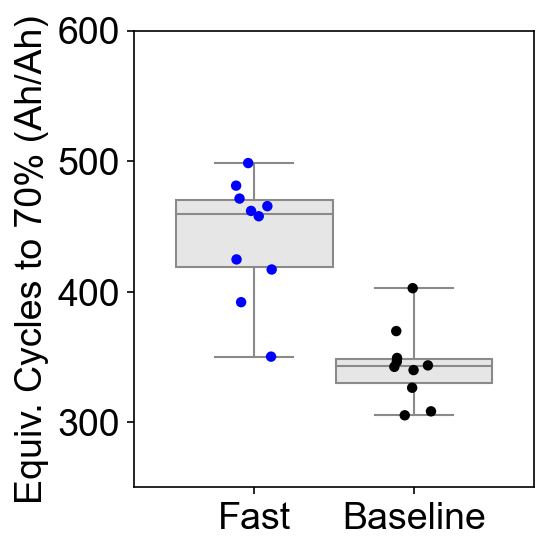

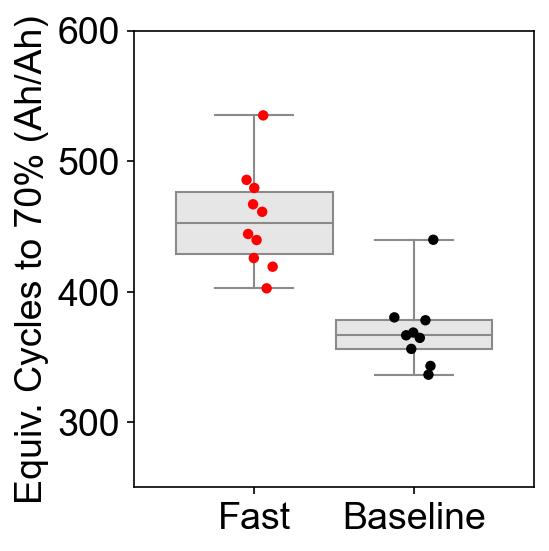

In [19]:
for data_df, color, color2 in zip([df_room_temp, df_high_temp], 
                            [(0.8, 0.8, 1), (1, 0.8, 0.8)],
                            ['b', 'r']):
    
    plt.figure(figsize=(4, 4))
    
    bp = sns.boxplot(x='retention', y='ahah',
                     data=data_df,
                     palette=[GREY, GREY],
                     hue='formation_type',
                     showfliers=False,
                     whis=1e9,
                     linewidth=1
                    ) 

    bp = sns.stripplot(x='retention', y='ahah', 
                       data=data_df, 
                       jitter=True,
                       dodge=True, 
                       marker='o',
                       palette=['black', color2],
                       hue='formation_type',
                       alpha=1)

    bp.invert_xaxis()
    
    bp.set(ylabel='Equiv. Cycles to 70% (Ah/Ah)',
           xlabel='',
           title='',
           ylim=(250, 600),
           xlim=(1.5, 0.5))

    ax = plt.gca()
    ax.grid(False)
    
    ax.set_xticks([1.2, 0.80])
    ax.set_xticklabels(['Fast', 'Baseline'])
    plt.legend().remove()